In [2]:
import sys
import cv2
import numpy as np
import random
import pytesseract
from IPython.core.display import HTML
import requests

from matplotlib import pyplot as plt
%matplotlib inline

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

In [11]:
%%writefile server.py

from flask import Flask, request, render_template
app = Flask(__name__)

@app.route('/')
def index():
    html = """
    <h1>안녕하세요</h1>    
    """
    return  html
datas = [45.7, 45, 10, 70.8]

@app.route('/signal')
def signal():
    global datas
    datas.append( float(request.args.get("data"))  )   
    return str(datas)

@app.route('/view')
def view():
    global datas    
    lables = [i+1 for i in range(len(datas))]    
    ctx = {"title":"그래프^^", 
           "lables":lables,  "data": datas,           
          }
    
    return render_template("view.html", ctx=ctx)
    
if __name__ == '__main__':
     app.run(host='0.0.0.0', debug=True, port=8000)      

Overwriting server.py


In [14]:
datas = [7.5, 6.7, 0.5, 3.4]

for data in datas : 
    response = requests.get("http://localhost:8000/signal?data=" + 
                            str(data))  
    print(response.text)

[45.7, 45, 10, 70.8, 7.5, 6.7, 0.5, 3.4, 7.5, 6.7, 0.5, 3.4, 7.5]
[45.7, 45, 10, 70.8, 7.5, 6.7, 0.5, 3.4, 7.5, 6.7, 0.5, 3.4, 7.5, 6.7]
[45.7, 45, 10, 70.8, 7.5, 6.7, 0.5, 3.4, 7.5, 6.7, 0.5, 3.4, 7.5, 6.7, 0.5]
[45.7, 45, 10, 70.8, 7.5, 6.7, 0.5, 3.4, 7.5, 6.7, 0.5, 3.4, 7.5, 6.7, 0.5, 3.4]


# Template matching

In [8]:
img = cv2.imread('circuit.bmp', cv2.IMREAD_COLOR)
templ = cv2.imread('crystal.bmp', cv2.IMREAD_COLOR)

img = img + (50, 50, 50)

noise = np.zeros(img.shape, np.int32)
cv2.randn(noise, 0, 10)
img = cv2.add(img, noise, dtype=cv2.CV_8UC3)

#res = cv2.matchTemplate(img, templ, cv2.TM_CCOEFF_NORMED)
res = cv2.matchTemplate(img, templ, cv2.TM_SQDIFF_NORMED)
res_norm = cv2.normalize(res, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

minv, maxv, minloc , maxloc = cv2.minMaxLoc(res)

print('maxv:', maxv)
print('minv:', minv)

(th, tw) = templ.shape[:2]
#cv2.rectangle(img, maxloc, (maxloc[0] + tw, maxloc[1] + th), (0, 0, 255), 2)
cv2.rectangle(img, minloc, (minloc[0] + tw, minloc[1] + th), (0, 0, 255), 2)

cv2.imshow('templ', templ)
cv2.imshow('res_norm', res_norm)
cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()


maxv: 0.77127605676651
minv: 0.14180374145507812


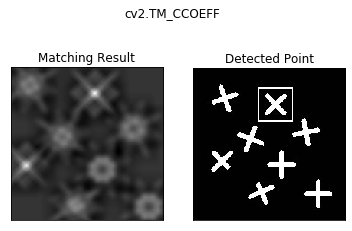

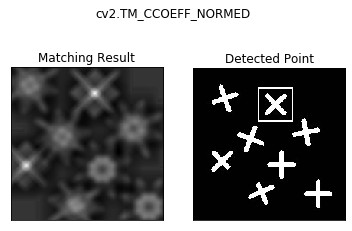

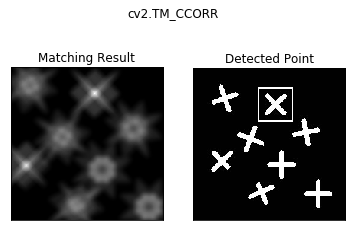

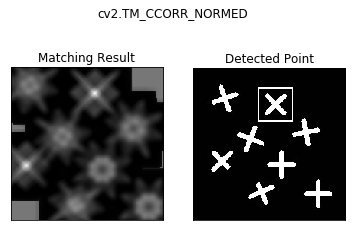

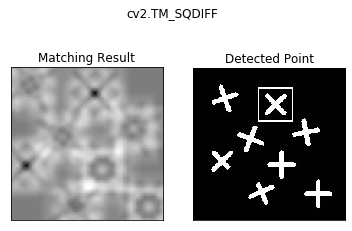

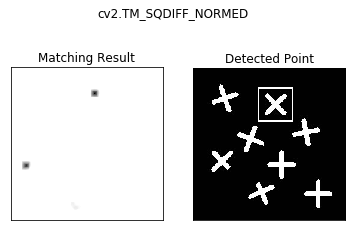

In [13]:
img = cv2.imread('cross.jpg',0)
img2 = img.copy()
template = cv2.imread('template.jpg',0)
w, h = template.shape[::-1]


# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)


    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc



    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 2)


    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

In [31]:
img_rgb = cv2.imread('input2.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('template2.jpg', 0)
w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)

threshold = 0.68
loc = np.where(res >= threshold)

In [26]:
print(loc)

(array([394, 394, 394, 394, 394, 395, 395, 395, 395, 395, 395, 395, 395,
       396, 396, 396, 396, 396, 396, 396, 396, 396, 397, 397, 397, 397,
       397, 397, 397, 397, 397, 397, 398, 398, 398, 398, 398, 398, 398,
       398, 398, 398, 398, 399, 399, 399, 399, 399, 399, 399, 399, 399,
       399, 399, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400,
       401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 402, 402,
       402, 402, 402, 402, 402, 402, 402, 402, 402, 403, 403, 403, 403,
       403, 403, 403, 403, 403, 403, 404, 404, 404, 404, 404, 404, 404,
       404, 404, 405, 405, 405, 405, 405, 405, 405, 405], dtype=int64), array([301, 302, 303, 304, 305, 300, 301, 302, 303, 304, 305, 306, 307,
       300, 301, 302, 303, 304, 305, 306, 307, 308, 299, 300, 301, 302,
       303, 304, 305, 306, 307, 308, 299, 300, 301, 302, 303, 304, 305,
       306, 307, 308, 309, 299, 300, 301, 302, 303, 304, 305, 306, 307,
       308, 309, 299, 300, 301, 302, 303, 304, 305, 306, 307, 3

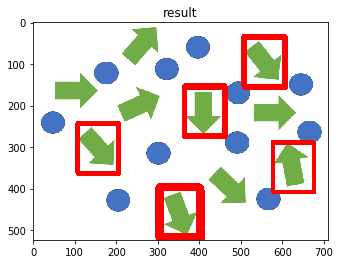

In [32]:
for pt in zip(*loc[::-1]):
    #print(pt)
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)

imshow('result', img_rgb)

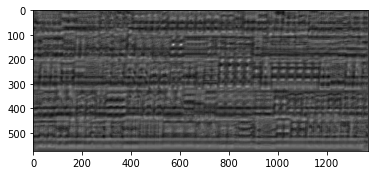

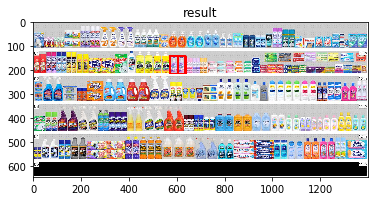

In [49]:
img_rgb = cv2.imread('input4.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('template4.png', 0)
w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)

plt.imshow(res, cmap='gray')
plt.show()
threshold = 0.5
loc = np.where(res >= threshold)

for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)

imshow('result', img_rgb)

In [41]:
a = loc[::-1]

print(a[0])
print(a[1])
#for pt in zip(*loc[::-1]):

a = [1,2,3,4,5,7]
b = ['a', 'b', 'c', 'd', 'e', 'f']

for i in range(len(a)) :
    print(a[i], b[i])    

for v in zip(a,b)   :
    print(v[0], v[1])   
    

[572 604 570 571 572 573 574 602 603 604 605 606 569 570 571 572 573 574
 575 601 602 603 604 605 606 607 569 570 571 572 573 574 601 602 603 604
 605 606 572 604]
[139 139 140 140 140 140 140 140 140 140 140 140 141 141 141 141 141 141
 141 141 141 141 141 141 141 141 142 142 142 142 142 142 142 142 142 142
 142 142 143 143]
1 a
2 b
3 c
4 d
5 e
7 f
1 a
2 b
3 c
4 d
5 e
7 f


In [62]:
a = [[1,2,3], 
     [4,5,6]]

for v in a :
    print(v)
    print(v[0])

[1, 2, 3]
1
[4, 5, 6]
4


In [65]:
for v in zip(a) :    
    print(v)    
    print(v[0])
    print(v[0][0])

([1, 2, 3],)
[1, 2, 3]
1
([4, 5, 6],)
[4, 5, 6]
4


In [69]:
print(a)
for v in zip(*a) :      #  zip(a[0,:], a[1,:]  )
    print(v)  
    print(v[0])

[[1, 2, 3], [4, 5, 6]]
(1, 4)
1
(2, 5)
2
(3, 6)
3


In [72]:
print(a)
for v in a :
    print(v)
    
for (i, v) in enumerate(a) :
    print(i, v)
    
for k in enumerate(a) :
    print(k[0], k[1])

[[1, 2, 3], [4, 5, 6]]
0 [1, 2, 3]
1 [4, 5, 6]
0 [1, 2, 3]
1 [4, 5, 6]


In [78]:
def fun(a, b, c) :
    print(a, b, c)
    
fun(1,4,5)

fun(*[1,4,5])    #  ->  fun(1,4,5)

1 4 5
1 4 5


(array([55, 55, 56], dtype=int64), array([980, 981, 980], dtype=int64))


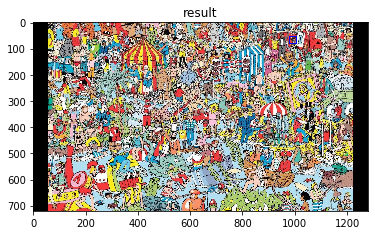

In [83]:
img_rgb = cv2.imread('find_waldo.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('waldo.png', 0)
w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)

threshold = 0.5
loc = np.where(res >= threshold)
print(loc)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (255, 0, 0), 2)

imshow('result', img_rgb)

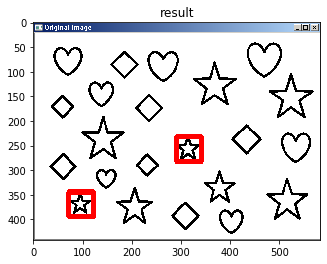

In [82]:
img_rgb = cv2.imread('input3.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('template_s.png', 0)
w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)

threshold = 0.4
loc = np.where(res >= threshold)

for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)

imshow('result', img_rgb)

# Face Detection

In [101]:
src = cv2.imread('face04.jpg')
classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = classifier.detectMultiScale(src)

In [102]:
print(faces)
print(src.shape)

[[332 274  96  96]
 [ 28 258  97  97]
 [345  48  91  91]
 [ 40  67  77  77]
 [ 44 479  84  84]
 [343 486  91  91]
 [131 444 124 124]]
(658, 627, 3)


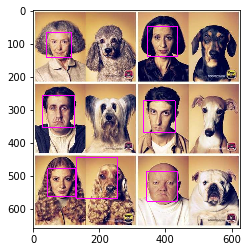

In [103]:
for (x, y, w, h) in faces:
        cv2.rectangle(src, (x, y), (x + w, y + h), (255, 0, 255), 2)
imshow("", src)

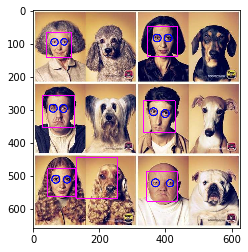

In [126]:
src = cv2.imread('face04.jpg')
face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('haarcascade_eye.xml')

faces = face_classifier.detectMultiScale(src)

for (x1, y1, w1, h1) in faces:
    cv2.rectangle(src, (x1, y1), (x1 + w1, y1 + h1), (255, 0, 255), 2)
    faceROI = src[y1:y1 + h1, x1:x1 + w1]
    eyes = eye_classifier.detectMultiScale(faceROI)
    for (x2, y2, w2, h2) in eyes:
        center = (int(x1+x2 + w2 / 2), int(y1+y2 + h2 / 2))
        cv2.circle(src, center, int(w2 / 2), (255, 0, 0), 2, cv2.LINE_AA)
        #cv2.rectangle(src, (x, y), (x + w, y + h), (255, 0, 255), 2)
imshow("", src)

In [125]:
cap = cv2.VideoCapture(0)

face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('haarcascade_eye.xml')
               
while True:
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray)
        
    for (x1, y1, w1, h1) in faces:
        cv2.rectangle(frame, (x1, y1), (x1 + w1, y1 + h1), (255, 0, 255), 2)
        
        faceROI = src[y1:y1 + h1, x1:x1 + w1]
        eyes = eye_classifier.detectMultiScale(faceROI)
        for (x2, y2, w2, h2) in eyes:
            center = (int(x1+ x2 + w2 / 2), int(y1 +y2 + h2 / 2))
            cv2.circle(frame, center, int(w2 / 2), (255, 0, 0), 2, cv2.LINE_AA)
    
    cv2.imshow('frame', frame)                
    if cv2.waitKey(10) == 27:
        break

cap.release()        
cv2.destroyAllWindows()